In [105]:
#Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from scipy.stats import ttest_ind
from sklearn.preprocessing import label_binarize


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

from scipy import stats

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

#Objetivo

El cáncer de seno es una enfermedad que impacta a un gran número de mujeres en todo el mundo. En este contexto, nuestro objetivo es llevar a cabo un análisis exhaustivo del conjunto de datos relacionado con esta enfermedad. Este proceso implica la limpieza y preparación de los datos para garantizar su calidad y confiabilidad. Posteriormente, nos proponemos realizar procesos clasificatorios que permitan distinguir entre casos benignos y malignos. Este enfoque clasificatorio no solo contribuirá a una comprensión más profunda de la enfermedad, sino que también puede ser fundamental para el desarrollo de estrategias de diagnóstico y tratamiento más efectivas.

#Exploraciòn de data

In [4]:
base_de_datos=pd.read_csv("breast-cancer.csv")

In [5]:
base_de_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
base_de_datos.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
base_de_datos.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
base_de_datos.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Se disponen de 32 características con un total de 569 registros, todos completos en cuanto a información. Con el objetivo de realizar un reconocimiento inicial de las relaciones entre estas características, se emplea la función pairplot

In [9]:
sns.pairplot(base_de_datos)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
cols=base_de_datos.columns
cols

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
df_columnas_numericas = base_de_datos.select_dtypes(include='number')
df_columnas_numericas

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [12]:
df_columnas_numericas.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


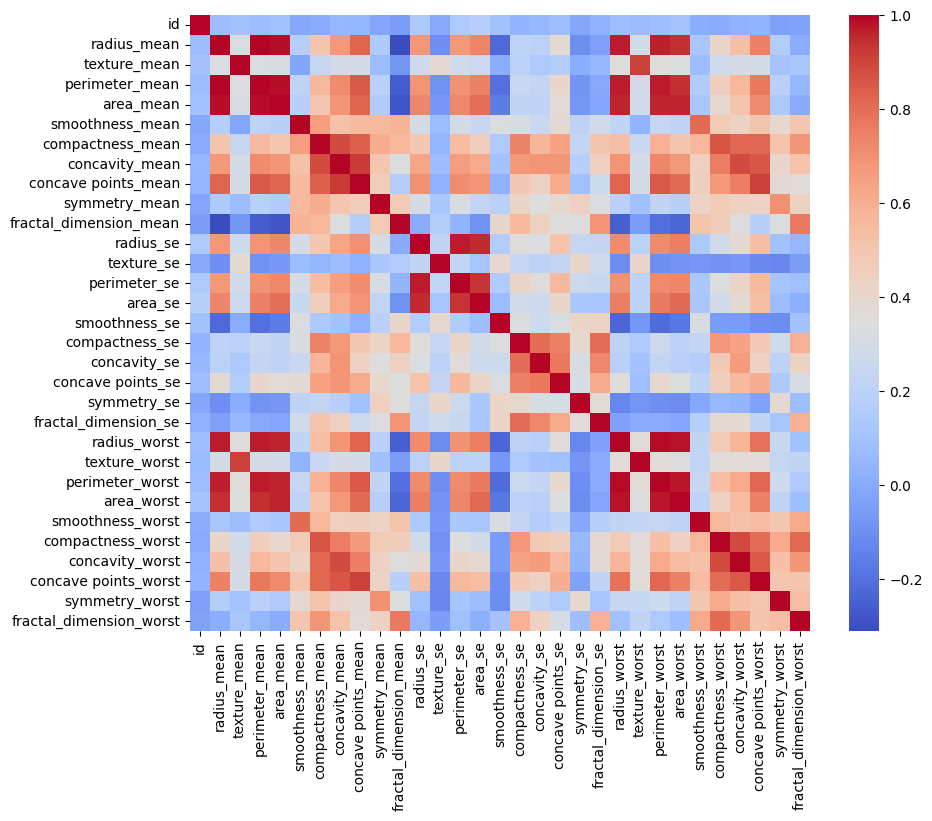

In [13]:
# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 8))

# Crear un mapa de calor con Seaborn y agregar anotaciones
sns.heatmap(df_columnas_numericas.corr(),cmap="coolwarm", ax=ax)

# Mostrar el mapa de calor
plt.show()

Text(0, 0.5, 'Conteo')

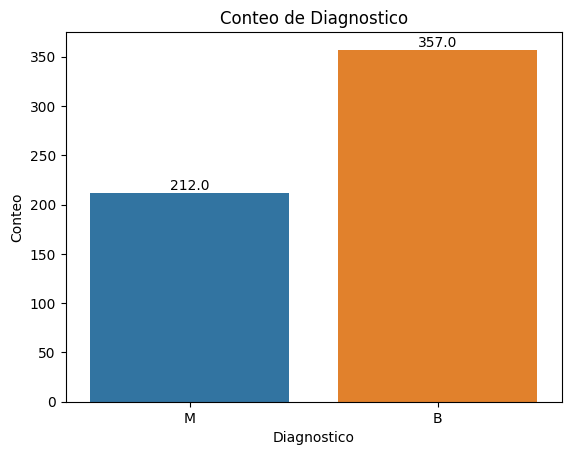

In [14]:

ax = sns.countplot(data=base_de_datos, x='diagnosis')

# Agregar números encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_title('Conteo de Diagnostico')
plt.xlabel('Diagnostico')
plt.ylabel('Conteo')

In [15]:
def relacionvariables(base_de_datos, variable, relacion):
    binwidth=1
    ax = sns.histplot(data=base_de_datos, x=variable, hue=relacion, multiple='dodge',  bins=20)
    # Agregar números encima de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    # Configurar el título de los ejes (corregido)
    ax.set_title(f'{variable} vs {relacion}')

    # Mostrar el gráfico
    plt.xlabel(variable)
    plt.ylabel('Conteo')
    plt.show()

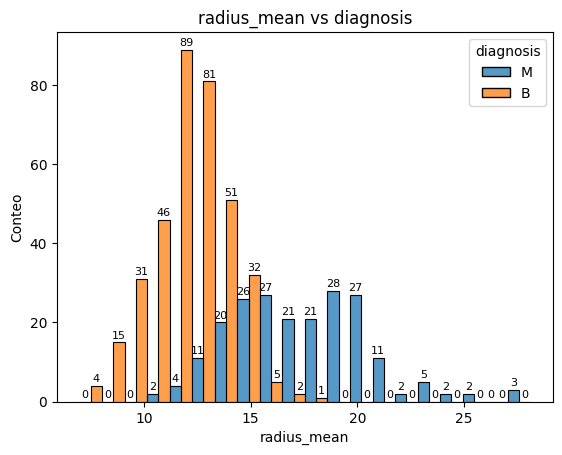

In [16]:
relacionvariables(base_de_datos,'radius_mean', 'diagnosis')


Se puede observar una relación directa entre el tamaño del radio y el diagnóstico en el conjunto de datos. Los radios más pequeños están asociados en mayor proporción con diagnósticos benignos, mientras que los radios de los casos malignos tienden a ser más grandes. Esta tendencia se refleja tanto en la descripción estadística de los datos como en el gráfico de violín, proporcionando una clara visualización de la distribución de los radios en función de la naturaleza del diagnóstico.

In [17]:
base_de_datos.groupby('diagnosis')['radius_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,12.146524,1.780512,6.981,11.080,12.200,13.37,17.85
M,212.0,17.462830,3.203971,10.950,15.075,17.325,19.59,28.11


In [18]:
grupos=base_de_datos.groupby('diagnosis')

In [19]:
for nombre_grupo, grupo in grupos:
    print(f"Diagnosis: {nombre_grupo}")
    for indice, fila in grupo.iterrows():
        print(f"  Radius Mean: {fila['radius_mean']}")

Diagnosis: B
  Radius Mean: 13.54
  Radius Mean: 13.08
  Radius Mean: 9.504
  Radius Mean: 13.03
  Radius Mean: 8.196
  Radius Mean: 12.05
  Radius Mean: 13.49
  Radius Mean: 11.76
  Radius Mean: 13.64
  Radius Mean: 11.94
  Radius Mean: 11.52
  Radius Mean: 13.05
  Radius Mean: 8.618
  Radius Mean: 10.17
  Radius Mean: 8.598
  Radius Mean: 9.173
  Radius Mean: 9.465
  Radius Mean: 11.31
  Radius Mean: 9.029
  Radius Mean: 12.78
  Radius Mean: 8.888
  Radius Mean: 12.31
  Radius Mean: 13.53
  Radius Mean: 12.86
  Radius Mean: 11.45
  Radius Mean: 13.34
  Radius Mean: 12.0
  Radius Mean: 12.36
  Radius Mean: 14.64
  Radius Mean: 14.62
  Radius Mean: 13.27
  Radius Mean: 13.45
  Radius Mean: 12.18
  Radius Mean: 9.787
  Radius Mean: 11.6
  Radius Mean: 6.981
  Radius Mean: 12.18
  Radius Mean: 9.876
  Radius Mean: 10.49
  Radius Mean: 11.64
  Radius Mean: 12.36
  Radius Mean: 11.34
  Radius Mean: 9.777
  Radius Mean: 12.63
  Radius Mean: 14.26
  Radius Mean: 10.51
  Radius Mean: 8.726
  

In [20]:
def relacionvariables_violin(base_de_datos, variable, relacion):
    ax = sns.violinplot(data=base_de_datos, x=variable, y=relacion, inner_kws=dict(box_width=15, whis_width=2, color=".8"))
    # Agregar números encima de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    # Configurar el título de los ejes (corregido)
    ax.set_title(f'{variable} vs {relacion}')

    # Mostrar el gráfico
    plt.xlabel(variable)
    plt.ylabel('Conteo')
    plt.show()

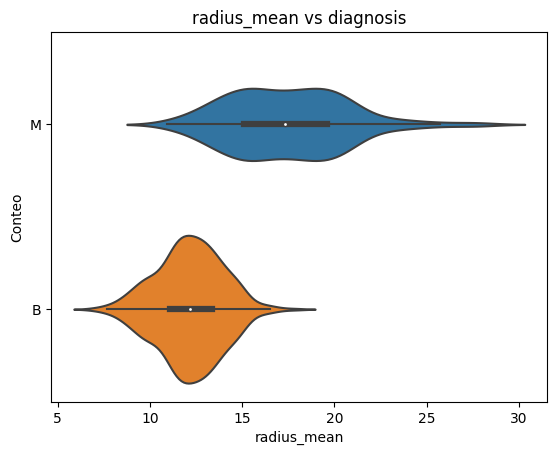

In [21]:
relacionvariables_violin(base_de_datos,'radius_mean', 'diagnosis')

La concavidad en el contexto del cáncer de seno se refiere a la forma de la masa o tumor observado en las imágenes médicas, como mamografías o imágenes por resonancia magnética. La concavidad implica la presencia de hendiduras, depresiones o curvas cóncavas en el contorno de la masa.

En términos más sencillos, si una masa tiene una forma cóncava, su contorno podría tener curvas hacia adentro, creando áreas de hendiduras o concavidades en lugar de ser suave y redondeada.

In [22]:
base_de_datos.groupby('diagnosis')['concavity_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,0.046058,0.043442,0.00000,0.020310,0.03709,0.05999,0.4108
M,212.0,0.160775,0.075019,0.02398,0.109525,0.15135,0.20305,0.4268


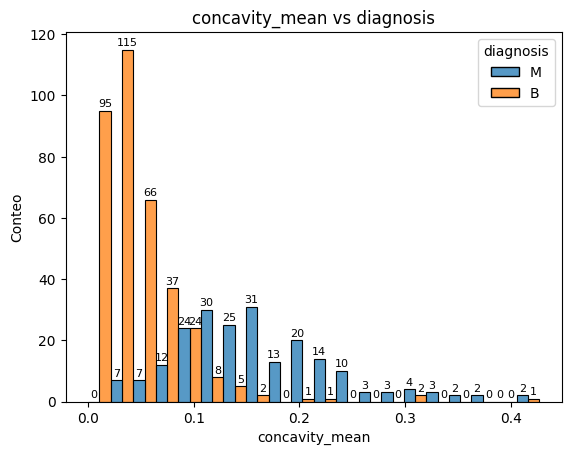

In [23]:
relacionvariables(base_de_datos,'concavity_mean', 'diagnosis')

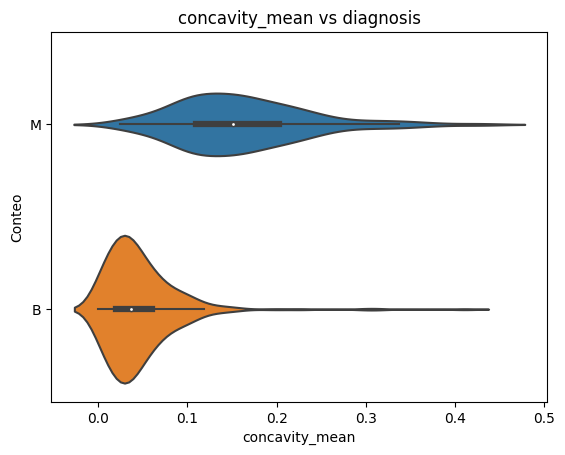

In [24]:
relacionvariables_violin(base_de_datos,'concavity_mean', 'diagnosis')

La presencia de concavidades de gran tamaño sugiere la presencia de tumores malignos.

La dimensión fractal es una medida que describe la complejidad y la irregularidad de un objeto o una estructura. En el contexto de las imágenes médicas y el cáncer de seno, la dimensión fractal se utiliza para cuantificar la complejidad de la forma de una masa tumoral.

Una dimensión fractal más alta indica una mayor complejidad estructural y una forma más irregular.

In [25]:
base_de_datos.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [26]:
base_de_datos.groupby('diagnosis')['fractal_dimension_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,0.062867,0.006747,0.05185,0.058530,0.061540,0.065760,0.09575
M,212.0,0.062680,0.007573,0.04996,0.056598,0.061575,0.067075,0.09744


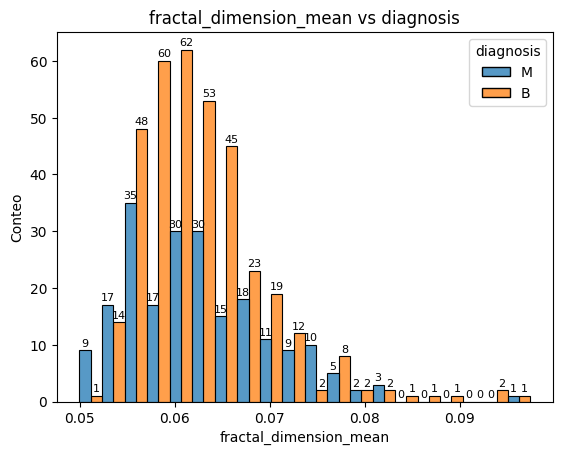

In [27]:
relacionvariables(base_de_datos,'fractal_dimension_mean', 'diagnosis')

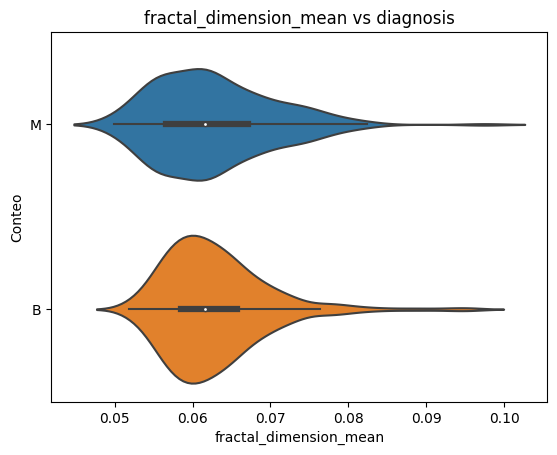

In [28]:
relacionvariables_violin(base_de_datos,'fractal_dimension_mean', 'diagnosis')

los valores de la dimensión fractal se distribuyen uniformemente entre los casos benignos y malignos, eso sugiere que no hay una diferencia significativa en la complejidad fractal promedio entre los dos grupos. En otras palabras, la complejidad estructural, medida por la dimensión fractal, no parece ser un factor distintivo entre tumores benignos y malignos en el conjunto de datos que estás analizando

In [29]:
base_de_datos.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Desarrollaremos un modelo con variables 'radius_mean','concavity_mean', 'perimeter_mean', 'area_mean'

In [30]:
base_de_datos.groupby('diagnosis')['area_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,462.790196,134.287118,143.5,378.2,458.4,551.10,992.1
M,212.0,978.376415,367.937978,361.6,705.3,932.0,1203.75,2501.0


# Modelo sklearn

## Entrenamiento

In [82]:

X = base_de_datos[['radius_mean', 'concavity_mean']]
y = base_de_datos['diagnosis']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

diccionario_modelo = {}

def modelo_entrenamiento(modelo, X, y):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    modelo.fit(X_train_scaled, y_train)
    predicciones = modelo.predict(X_test_scaled)
    precision = precision_score(y_test, predicciones)
    recall = recall_score(y_test, predicciones)
    matriz_confusion = confusion_matrix(y_test, predicciones)
    diccionario_modelo['modelo'] = modelo
    diccionario_modelo['precision'] = precision
    diccionario_modelo['recall'] = recall
    diccionario_modelo['Matriz de confusion']=matriz_confusion



In [83]:

lg = LogisticRegression()

modelo_entrenamiento(lg, X, y)

In [84]:
diccionario_modelo['Matriz de confusion']

array([[71,  0],
       [ 4, 39]])

In [85]:
TN, FP, FN, TP = diccionario_modelo['Matriz de confusion'].ravel()

# Imprimir los valores
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

True Negatives: 71
False Positives: 0
False Negatives: 4
True Positives: 39


In [112]:
diccionario_modelo_stat = {}
X = base_de_datos[['radius_mean', 'concavity_mean']]
y = base_de_datos['diagnosis']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Añadir la matriz de cero
X_train = sm.add_constant(X_train, prepend=True)

# Definir variables de entrada
modelo = sm.Logit(endog=y_train, exog=X_train)
modelo = modelo.fit()

# Añadir la matriz de cero a las variables predictoras de prueba
X_test = sm.add_constant(X_test, prepend=True)

# Obtener predicciones
predicciones = modelo.predict(X_test)
y_prediciones = predicciones.round().astype(int)  # Redondear y convertir a entero

# Invertir la codificación para obtener etiquetas originales
y_test_decoded = label_encoder.inverse_transform(y_test)
y_prediciones_decoded = label_encoder.inverse_transform(y_prediciones)

#print(y_test_decoded)



y_test_bin = label_binarize(y_test_decoded, classes=['B', 'M'])
y_pred_bin = label_binarize(y_prediciones_decoded, classes=['B', 'M'])

#print(y_test_bin)
precision = precision_score(y_test_bin, y_pred_bin )
recall = recall_score(y_test_bin, y_pred_bin)
matriz_confusion = confusion_matrix(y_test_bin, y_pred_bin)

# Almacenar las métricas en el diccionario
diccionario_modelo_stat['precision'] = precision
diccionario_modelo_stat['recall'] = recall
diccionario_modelo_stat['Matriz de confusion'] = matriz_confusion

# Imprimir el diccionario con las métricas
print(diccionario_modelo_stat)

# Imprimir el resumen del modelo
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.221549
         Iterations 8
{'precision': 0.975, 'recall': 0.9069767441860465, 'Matriz de confusion': array([[70,  1],
       [ 4, 39]])}
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  455
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Dec 2023   Pseudo R-squ.:                  0.6642
Time:                        13:39:49   Log-Likelihood:                -100.80
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                 2.614e-87
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [108]:
TN, FP, FN, TP = diccionario_modelo_stat['Matriz de confusion'].ravel()

# Imprimir los valores
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

True Negatives: 70
False Positives: 1
False Negatives: 4
True Positives: 39


True Negatives (TN): Representa la cantidad de casos benignos que fueron correctamente clasificados como benignos. 70 casos benignos fueron clasificados correctamente.

False Positives (FP): Representa la cantidad de casos benignos que fueron incorrectamente clasificados como malignos. Hay 1 caso benigno que fue incorrectamente clasificado como maligno.

False Negatives (FN): Representa la cantidad de casos malignos que fueron incorrectamente clasificados como benignos. Hay 4 casos malignos que fueron incorrectamente clasificados como benignos.

True Positives (TP): Representa la cantidad de casos malignos que fueron correctamente clasificados como malignos. 39 casos malignos fueron clasificados correctamente.

In [110]:
datos_maligno = base_de_datos[base_de_datos['diagnosis'] == 'M'][['radius_mean', 'concavity_mean']]
datos_benigno = base_de_datos[base_de_datos['diagnosis'] == 'B'][['radius_mean', 'concavity_mean']]

# Realizar la prueba t de Student
estadistica_t, p_valor = ttest_ind(datos_maligno, datos_benigno)

# Imprimir los resultados
print("Estadística t:", estadistica_t)
print("Valor p:", p_valor)

Estadística t: [25.43582161 23.10396343]
Valor p: [8.46594057e-96 9.96655576e-84]


In [111]:
datos_maligno = base_de_datos[base_de_datos['diagnosis'] == 'M'][['radius_mean']]
datos_benigno = base_de_datos[base_de_datos['diagnosis'] == 'B'][['radius_mean']]

# Realizar la prueba t de Student
estadistica_t, p_valor = ttest_ind(datos_maligno, datos_benigno)

# Imprimir los resultados
print("Estadística t:", estadistica_t)
print("Valor p:", p_valor)

Estadística t: [25.43582161]
Valor p: [8.46594057e-96]
